**1. Record your coin spinning!**

Click the code in the rectangle below, then press shift+return to evaluate.

In [5]:
%matplotlib inline

import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig

fs = 48000  # sampling rate (measurements per second)
duration = 10  # seconds (10 is a good value)
recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
print('Recording for the next {} seconds...'.format(duration))
sd.wait(); print('Done!')

Recording for 10 seconds...
Done!


**2. Plot the raw sound.** (again, click in the cell then shift+return)

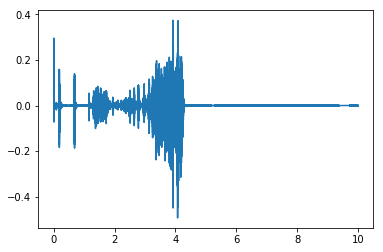

In [13]:
ts = np.linspace(0, duration, duration*fs)
signal = np.array([y[0] for y in recording])
plt.plot(ts, signal);
plt.show();

**3. Play back the full recording**

In [7]:
sd.play(10*signal, fs)
sd.wait()

**4. Choose** `start_t` **and** `end_t` **such that only the spinning coin signal is visible.**

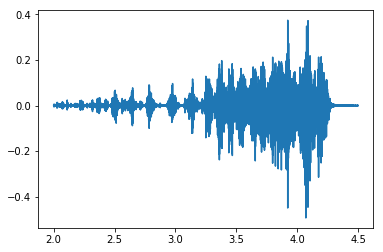

In [14]:
start_t = 2;
end_t = 4.5;

ind = np.logical_and(ts >= start_t, ts <= end_t)
s1 = signal[ind]
t1 = ts[ind]
plt.plot(t1, s1)
plt.show()

sd.play(10*s1, fs)

**5. Let's look at the spectrum of the above signal.**

**6. Generate a smoothed version of the signal to remove high-frequency noise.**

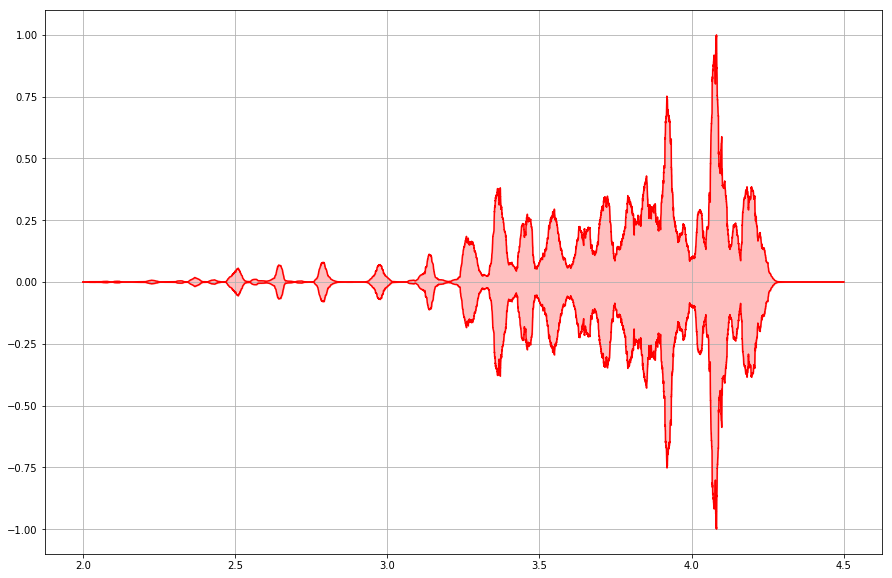

In [21]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# Adjust this number!
nwindow = 1000  # 1000 is a good starting value

ta = t1
sa = smooth(s1**2, nwindow)

plt.figure(figsize=(15,10));
ya = sa/np.max(sa)
plt.plot(ta, -ya, 'r');
plt.plot(ta, ya, 'r');
plt.fill_between(ta, -ya, ya, alpha=0.25, color='r')
plt.grid()

**7. Let's make a model of the signal.**

**We'll construct a model that looks like the following:**

$A = \left(\frac{t}{t_0}\right)^\alpha \sin\left[2 \pi f t \left(\frac{t}{t_0}\right)^\beta\right] \max\left[1 - \exp\left(\frac{t - \tau_{\rm ring}}{\tau_{\rm ring}}\right), 0\right]$

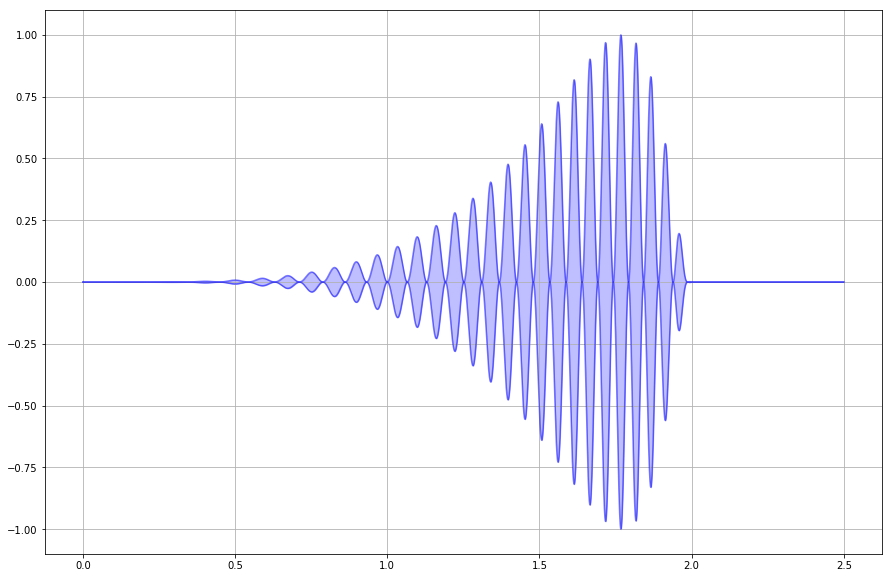

In [16]:
# Play with these numbers:
t0 = 1.0;  # 1.0
tring = 2.0;  # 2.0
ringtau = 0.1;  # 0.1
omega = 5.0;  # 5.0
phase = 0.0;  # 0.0
alpha = 2.0;  # 2.0
beta = 0.5;  # 0.5
# End

tmt = ta - min(ta);
yp = np.array([((t/t0)**alpha*np.sin(2*np.pi*omega*(t + phase)*(t/t0)**beta)*
                max(1 - np.exp(-(tring - t)/ringtau), 0))**2 for t in tmt]);
yp = yp/np.max(yp)

plt.figure(figsize=(15,10));
plt.plot(tmt, -yp, 'b', alpha=0.5);
plt.plot(tmt, yp, 'b', alpha=0.5);
plt.fill_between(tmt, -yp, yp, alpha=0.25, color='b');
plt.grid()

**8. Play with the numbers defined below to find the best match to the coin signal:**

Score is:   0.22, can you do better?


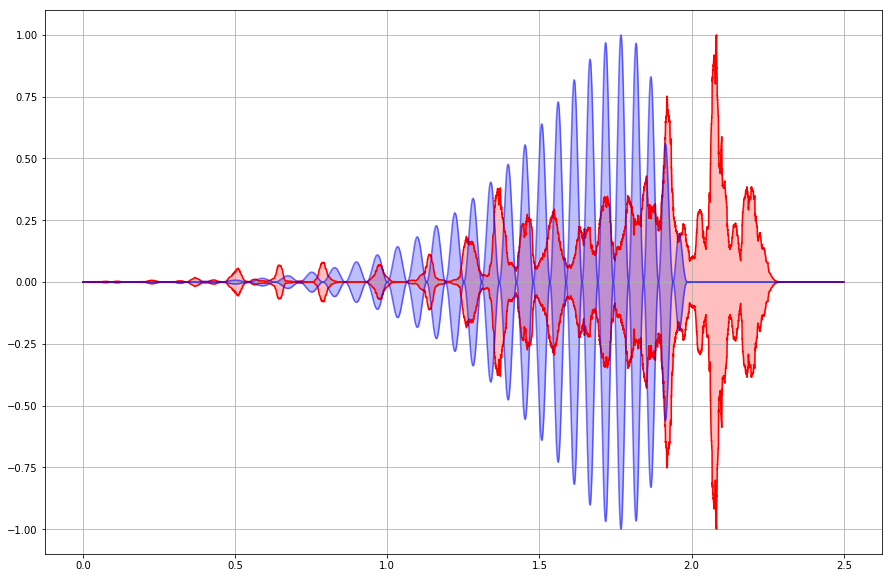

In [18]:
# Play with these numbers:
t0 = 1.0;  # 1.0
tring = 2.0;  # 2.0
ringtau = 0.1;  # 0.1
omega = 5.0;  # 5.0
phase = 0.0;  # 0.0
alpha = 2.0;  # 2.0
beta = 0.5;  # 0.5
# End

# Don't edit below this line, that would be cheating! :-0
tmt = ta - min(ta);
yp = np.array([((t/t0)**alpha*np.sin(2*np.pi*omega*(t + phase)*(t/t0)**beta)*
                max(1 - np.exp(-(tring - t)/ringtau), 0))**2 for t in tmt]);
yp = yp/np.max(yp)

score = 1.0/(np.sum(abs(yp - ya)**2)*(100.0/len(tmt)));
print('Score is: {:6.2f}, can you do better?'.format(score))

plt.figure(figsize=(15,10));
plt.plot(tmt, -ya, 'r');
plt.plot(tmt, ya, 'r');
plt.fill_between(tmt, -ya, ya, alpha=0.25, color='r')
plt.plot(tmt, -yp, 'b', alpha=0.5);
plt.plot(tmt, yp, 'b', alpha=0.5);
plt.fill_between(tmt, -yp, yp, alpha=0.25, color='b');
plt.grid()

**9. Let's look at what the LIGO signal of two merging black holes looked like!**

Data acquired from: https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html

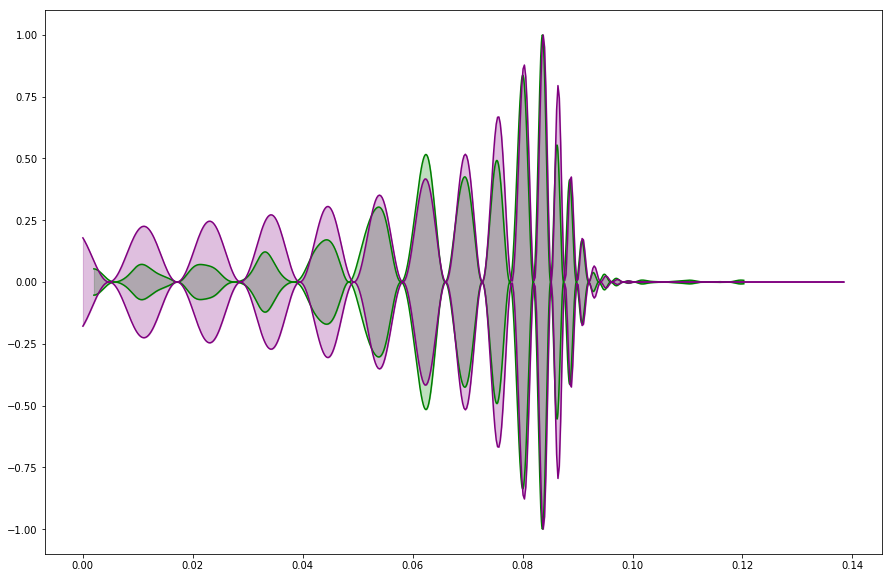

In [346]:
offset = 0.002;

plt.figure(figsize=(15,10));
fdata = tuple(open('fig1-waveform-H.txt', 'r'))
fdata = [[float(y) for y in x.split()] for x in fdata[1500:-2]]
gwx, gwy = np.transpose(np.array(fdata));
gwy = (gwy/max(gwy))**2
gwx = gwx - min(gwx) + offset
plt.plot(gwx, -gwy, 'g')
plt.plot(gwx, gwy, 'g')
plt.fill_between(gwx, -gwy, gwy, alpha=0.25, color='g')

fdata = tuple(open('GW150914_4_NR_waveform.txt', 'r'))
fdata = [[float(y) for y in x.split()] for x in fdata[2200:-2]]
gwx, gwy = np.transpose(np.array(fdata));
gwy = (gwy/max(gwy))**2
gwx = gwx - min(gwx)
plt.plot(gwx, -gwy, 'purple')
plt.plot(gwx, gwy, 'purple')
plt.fill_between(gwx, -gwy, gwy, alpha=0.25, color='purple')

plt.show()

**Extras: Don't use the cells below unless instructed.**

In [12]:
import pickle
recording = np.array(pickle.load(open('coin.pickle', 'rb')));

In [115]:
import pickle
with open('coin.pickle','wb') as f:
    pickle.dump(recording, f)